# 01. Necessasry Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 02. Loading & Reading the dataset

In [6]:
df1 = pd.read_excel("/content/drive/MyDrive/Python/Datasets/DATA FOR ASSIGNMENT _ FINAL _ FOR SPRING - 2023_ATMOSPHERIC DATA FROM CHITTAGONG.xlsx")

In [7]:
df1.head(10)

,Year,Month,DAY,TEM,DPT,WIS,HUM,SLP,TRAN,ARAN,RAN,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,1964,1,31,19.6,13.3,4.4,71.52,1014.6,3,0.10,NRT,NaN,NaN,ARAN,AVERAGE RAINFALL
1,1964,2,29,22.3,14.5,4.7,71.03,1013.0,3,0.10,NRT,NaN,NaN,TRAN,MONTHLY TOTAL RAINFALL
2,1964,3,31,26.5,21.4,6.1,78.06,1010.9,0,0.00,NRT,NaN,NaN,TEM,Temperature
3,1964,4,30,27.4,22.5,10.5,80.70,1007.7,198,6.60,LTR,NaN,NaN,DPT,Dew Point Temperature
4,1964,5,31,28.3,24.0,6.2,79.97,1004.6,195,6.29,LTR,NaN,NaN,WIS,Wind Speed
5,1964,6,30,27.7,24.1,9.2,85.83,1001.7,419,13.97,MHR,NaN,NaN,HUM,Humidity
6,1964,7,31,26.8,24.7,8.8,88.74,1004.1,1077,34.74,MHR,NaN,NaN,SLP,Sea Level Pressure
7,1964,8,31,27.5,24.9,8.9,87.23,1001.4,623,20.10,MHR,NaN,NaN,RAN,Rainfall CATEGORY
8,1964,9,30,28.1,24.1,6.0,84.83,1004.5,266,8.87,LTR,NaN,NaN,NRT,No Rain and Trace
9,1964,10,31,27.1,24.1,5.4,85.42,1007.6,268,8.65,LTR,NaN,NaN,LTR,Light Rain


In [8]:
df = df1.iloc[:,0:11]
df.head()

,Year,Month,DAY,TEM,DPT,WIS,HUM,SLP,TRAN,ARAN,RAN
0,1964,1,31,19.6,13.3,4.4,71.52,1014.6,3,0.10,NRT
1,1964,2,29,22.3,14.5,4.7,71.03,1013.0,3,0.10,NRT
2,1964,3,31,26.5,21.4,6.1,78.06,1010.9,0,0.00,NRT
3,1964,4,30,27.4,22.5,10.5,80.70,1007.7,198,6.60,LTR
4,1964,5,31,28.3,24.0,6.2,79.97,1004.6,195,6.29,LTR


In [9]:
df.shape

(624, 11)

We can see our dataset contains 708 rows and 7 features/columns

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    624 non-null    int64  
 1   Month   624 non-null    int64  
 2   DAY     624 non-null    int64  
 3   TEM     624 non-null    float64
 4   DPT     624 non-null    float64
 5   WIS     624 non-null    float64
 6   HUM     624 non-null    float64
 7   SLP     624 non-null    float64
 8   TRAN    624 non-null    int64  
 9   ARAN    624 non-null    float64
 10  RAN     624 non-null    object 
dtypes: float64(6), int64(4), object(1)
memory usage: 53.8+ KB


**More about the dataset**

In [11]:
df.columns

Index(['Year', 'Month', 'DAY', 'TEM', 'DPT', 'WIS', 'HUM', 'SLP', 'TRAN',
       'ARAN', 'RAN'],
      dtype='object')

**We will work on the reports based on the features:**

Temperature, Dew Point Temperature, Wind Speed, Humidity, and Sea Level Pressure.

In [12]:
df = df[['TEM', 'DPT', 'WIS', 'HUM', 'SLP', 'RAN']]
df.head()

,TEM,DPT,WIS,HUM,SLP,RAN
0,19.6,13.3,4.4,71.52,1014.6,NRT
1,22.3,14.5,4.7,71.03,1013.0,NRT
2,26.5,21.4,6.1,78.06,1010.9,NRT
3,27.4,22.5,10.5,80.70,1007.7,LTR
4,28.3,24.0,6.2,79.97,1004.6,LTR


# 03. Checking Null/Missing values

In [13]:
null_count = df.isnull().sum()

null_count

TEM    0
DPT    0
WIS    0
HUM    0
SLP    0
RAN    0
dtype: int64

Another way to check null/missing values

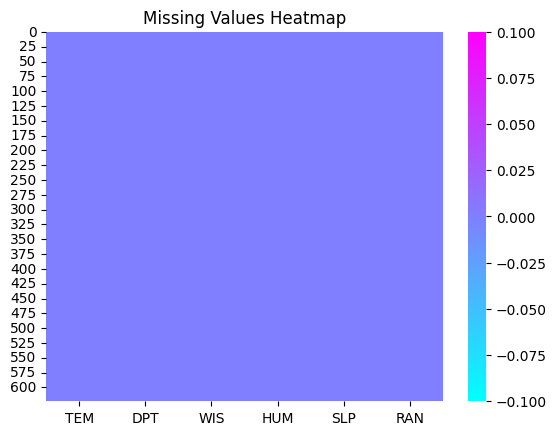

In [14]:
# Create a boolean mask where True represents missing values
null_mask = df.isnull()

# Use seaborn heatmap to visualize the missing values
sns.heatmap(null_mask, cmap='cool', cbar=True)

# Set plot title
plt.title('Missing Values Heatmap')

# Display the plot
plt.show()

**So, the dataset doesn't have any null or missing values**

# 04. Summary statistics

In [18]:
# Formatting the dataframe
format_dict = {'TEM':'{:.2f}',
                'DPT':'{:.2f}',
               'WIS':'{:.2f}',
               'HUM':'{:.2f}',
               'SLP':'{:.2f}'}

In [19]:
df.describe().style.format(format_dict)

,TEM,DPT,WIS,HUM,SLP
count,624.00,624.00,624.00,624.00,624.00
mean,25.73,20.87,6.56,79.21,1008.42
std,3.11,4.31,2.59,5.92,4.78
min,18.10,9.10,0.00,62.14,981.70
25%,23.38,16.80,4.60,75.18,1004.27
50%,27.30,23.00,6.10,79.59,1008.95
75%,28.10,24.50,8.30,84.38,1012.60
max,29.90,26.00,13.80,91.81,1016.70


**Five number summary measure**

In [20]:
df.describe().loc['min':'max'].style.format(format_dict)

,TEM,DPT,WIS,HUM,SLP
min,18.10,9.10,0.00,62.14,981.70
25%,23.38,16.80,4.60,75.18,1004.27
50%,27.30,23.00,6.10,79.59,1008.95
75%,28.10,24.50,8.30,84.38,1012.60
max,29.90,26.00,13.80,91.81,1016.70


# 05. Drawing correlation, covariance matrix

**For correlation and covariance matrix we will select**

'TEM', 'DPT', 'WIS', 'HUM', 'SLP' columns.

In [21]:
mat_col = df[['TEM','DPT','WIS','HUM','SLP']]
mat_col

,TEM,DPT,WIS,HUM,SLP
0,19.6,13.3,4.4,71.52,1014.6
1,22.3,14.5,4.7,71.03,1013.0
2,26.5,21.4,6.1,78.06,1010.9
3,27.4,22.5,10.5,80.70,1007.7
4,28.3,24.0,6.2,79.97,1004.6
...,...,...,...,...,...
619,28.6,25.7,6.4,84.52,1004.3
620,29.2,24.8,6.0,81.77,1006.2
621,27.6,23.9,3.6,80.97,1010.5
622,24.8,19.2,4.4,75.90,1012.6


**Correlation between features**

In [22]:
mat_col.corr().style.format(format_dict)

,TEM,DPT,WIS,HUM,SLP
TEM,1.00,0.93,0.49,0.63,-0.77
DPT,0.93,1.00,0.44,0.81,-0.80
WIS,0.49,0.44,1.00,0.27,-0.57
HUM,0.63,0.81,0.27,1.00,-0.71
SLP,-0.77,-0.80,-0.57,-0.71,1.00


**Visual representation of correlation matrix**

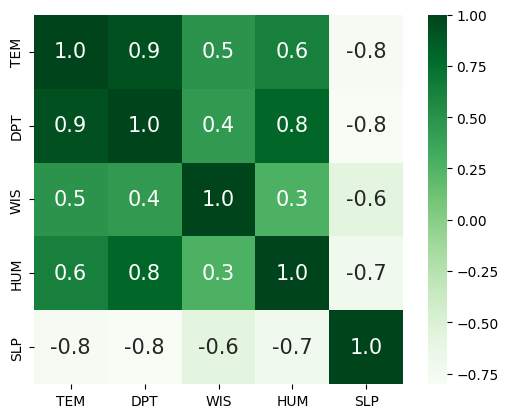

In [23]:
# Plotting the heatmap of correlation between features

sns.heatmap(mat_col.corr(), cbar=True, square= True, fmt='.1f',
            annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

**Covariance between features**

In [24]:
mat_col.cov().style.format(format_dict)

,TEM,DPT,WIS,HUM,SLP
TEM,9.66,12.52,3.93,11.57,-11.48
DPT,12.52,18.57,4.91,20.56,-16.52
WIS,3.93,4.91,6.72,4.19,-7.03
HUM,11.57,20.56,4.19,35.03,-20.20
SLP,-11.48,-16.52,-7.03,-20.20,22.82


**Visual representation of correlation matrix**

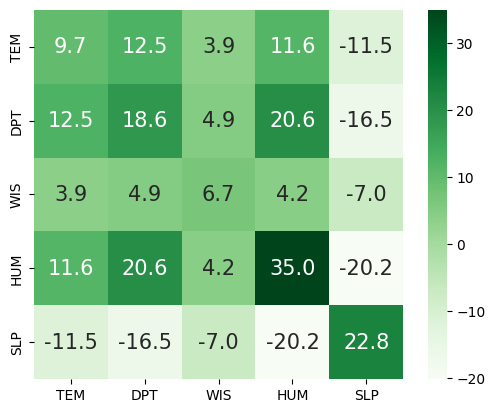

In [25]:
# Plotting the heatmap of correlation between features

sns.heatmap(mat_col.cov(), cbar=True, square= True, fmt='.1f',
            annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

# 06. Visualization of the Data

**Box Plot of the Features**

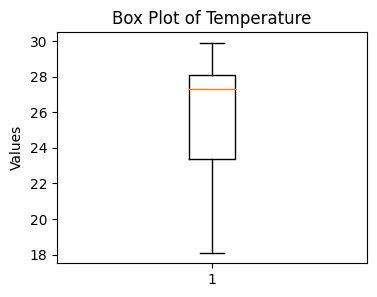

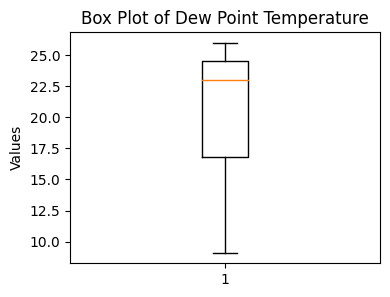

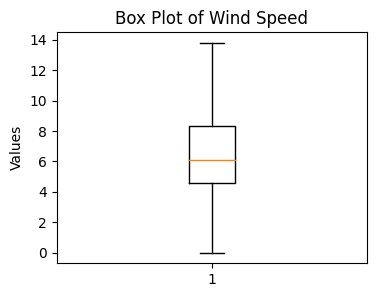

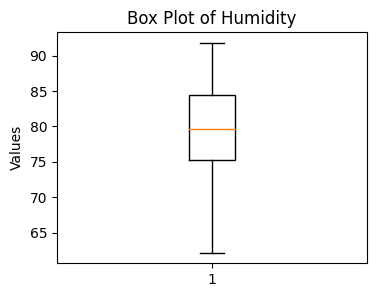

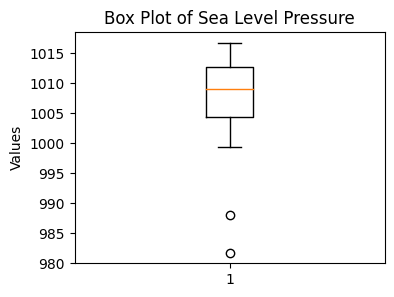

In [27]:
cols = {'TEM': "Temperature", 'DPT': 'Dew Point Temperature', 'WIS': 'Wind Speed',
        'HUM': 'Humidity', 'SLP': 'Sea Level Pressure'}
for col_key, col_title in cols.items():
    plt.figure(figsize=(4, 3))
    plt.boxplot(df[col_key].dropna())

    # Add title and labels
    plt.title('Box Plot of ' + col_title)
    plt.ylabel('Values')

    # Show the plot
    plt.show()

**Box plot of the Target Columns Values**

In [28]:
df['RAN'].value_counts()

LTR    224
NRT    205
MHR    195
Name: RAN, dtype: int64

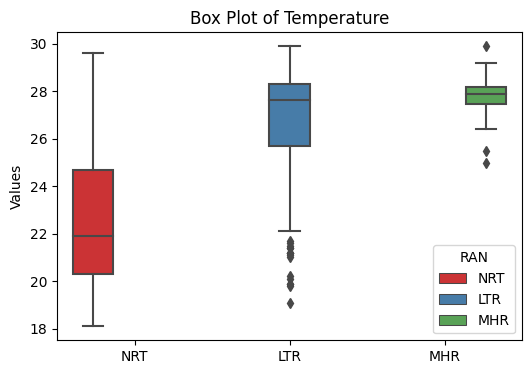

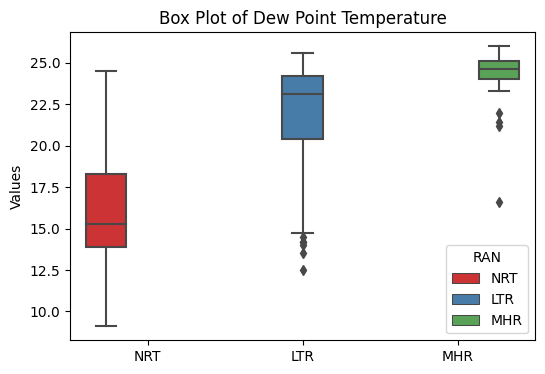

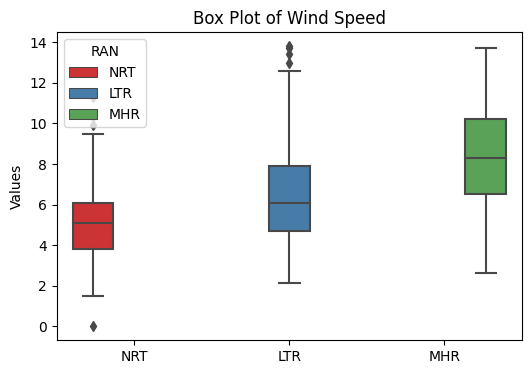

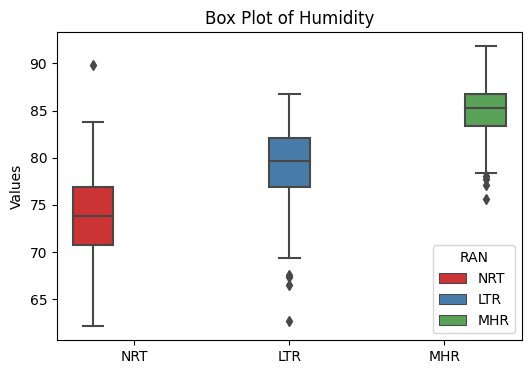

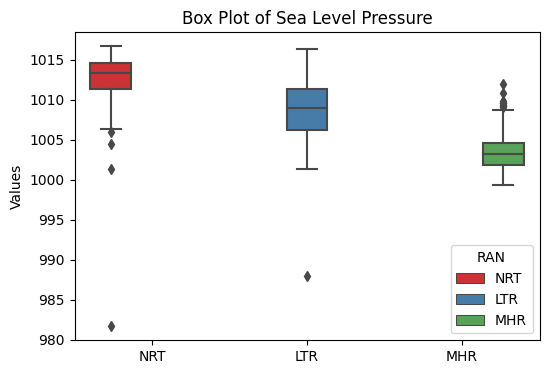

In [29]:
# Assuming 'df' is your DataFrame containing the dataset
cols = {'TEM': "Temperature", 'DPT': 'Dew Point Temperature', 'WIS': 'Wind Speed',
        'HUM': 'Humidity', 'SLP': 'Sea Level Pressure'}

# Assuming 'target_col' is the column containing the target variable
# Assuming 'target_categories' contains the different categories of the target variable
target_col = df['RAN']
target_categories = ['LTR', 'NRT', 'MHR']

# Loop through each column and create the box plots with different colors for the target variable
for col_key, col_title in cols.items():
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=target_col, y=df[col_key].dropna(), hue=target_col, palette='Set1')

    # Add title and labels
    plt.title('Box Plot of ' + col_title)
    plt.ylabel('Values')
    plt.xlabel('')

    # Show the plot
    plt.show()

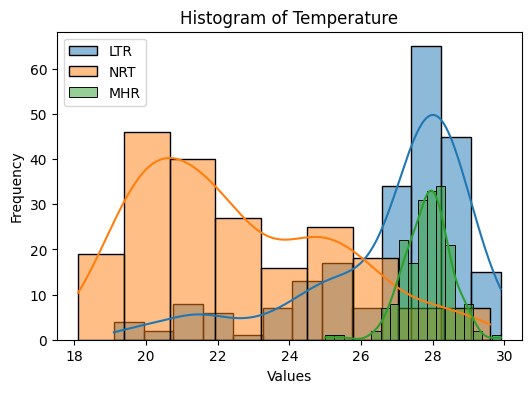

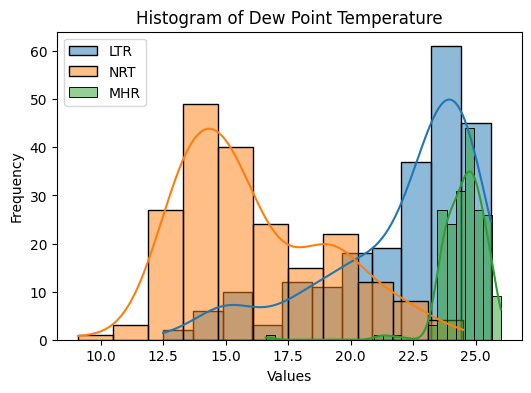

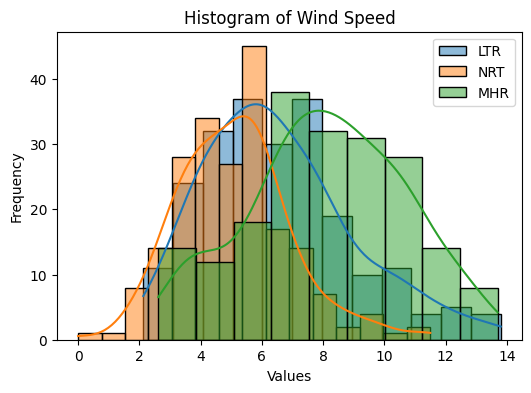

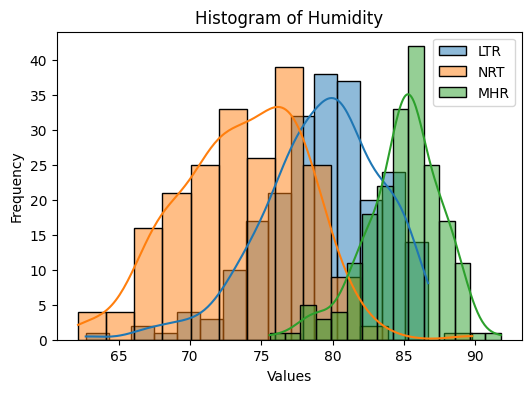

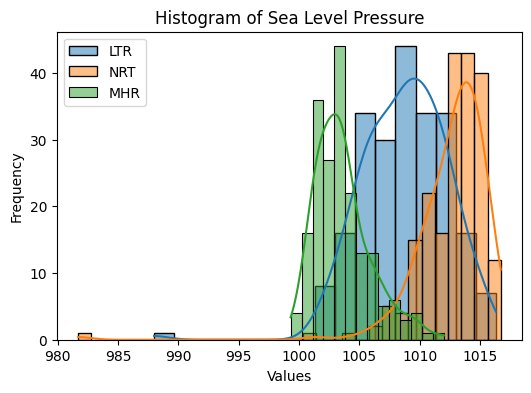

In [30]:
# Assuming 'df' is your DataFrame containing the dataset
cols = {'TEM': "Temperature", 'DPT': 'Dew Point Temperature', 'WIS': 'Wind Speed',
        'HUM': 'Humidity', 'SLP': 'Sea Level Pressure'}

# Assuming 'target_col' is the column name containing the target variable
# Assuming 'target_categories' contains the different categories of the target variable
target_col = 'RAN'
target_categories = ['LTR', 'NRT', 'MHR']

# Loop through each column and create the histograms with different colors for the target variable
for col_key, col_title in cols.items():
    plt.figure(figsize=(6, 4))  # Adjust the figure size if needed

    # Create histograms for each category of the target variable
    for category in target_categories:
        sns.histplot(df[col_key][df[target_col] == category].dropna(), label=category, kde=True)

    # Add title and labels
    plt.title('Histogram of ' + col_title)
    plt.xlabel('Values')
    plt.ylabel('Frequency')

    # Show the legend to indicate different categories
    plt.legend()

    # Show the plot
    plt.show()

#07. Dealing with categorical/object values

In [31]:
# Create a mapping for the categories
category_mapping = {'NRT': 1, 'LTR': 2, 'MHR': 3}

# Use the map function to replace the categorical values with numerical values
df['RAN'] = df['RAN'].map(category_mapping)

In [32]:
df.head()

,TEM,DPT,WIS,HUM,SLP,RAN
0,19.6,13.3,4.4,71.52,1014.6,1
1,22.3,14.5,4.7,71.03,1013.0,1
2,26.5,21.4,6.1,78.06,1010.9,1
3,27.4,22.5,10.5,80.70,1007.7,2
4,28.3,24.0,6.2,79.97,1004.6,2


In [33]:
df['RAN'].value_counts()

2    224
1    205
3    195
Name: RAN, dtype: int64

In [34]:
df.shape

(624, 6)

# 08. Model Preprocessing

In [35]:
X = df.iloc[:, :-1].values  # Features (all columns except the last one)
y = df.iloc[:, -1].values   # Target variable (last column)

In [36]:
X.shape, y.shape

((624, 5), (624,))

# Splitting the dataset

In [37]:
from sklearn.model_selection import train_test_split
# Perform the train-test split
# test_size specifies the proportion of the dataset to include in the test split (e.g., 0.2 means 20% test data)
# random_state ensures reproducibility, set it to a specific value or leave it None for random splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((499, 5), (125, 5), (499,), (125,))

# Normalizations

In [39]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.fit_transform(X_test)

# 09. Model performance

## Logistic Regression:

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold

# Create the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Define the number of folds (k=5)
k_folds = 5

# Perform k-fold cross-validation and get the accuracy scores for each fold
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(model, X_scaled_train, y_train, cv=kf)

# Calculate the average accuracy over all folds
average_accuracy = np.mean(accuracy_scores)
print(f"Average Accuracy: {average_accuracy:.2f}")

Average Accuracy: 0.76


## Decesion Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Perform k-fold cross-validation and get the accuracy scores for each fold
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(model, X_scaled_train, y_train, cv=kf)

# Calculate the average accuracy over all folds
average_accuracy = np.mean(accuracy_scores)
print(f"Average Accuracy: {average_accuracy:.2f}")

Average Accuracy: 0.69


## Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Decision Tree classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform k-fold cross-validation and get the accuracy scores for each fold
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(model, X_scaled_train, y_train, cv=kf)

# Calculate the average accuracy over all folds
average_accuracy = np.mean(accuracy_scores)
print(f"Average Accuracy: {average_accuracy:.2f}")

Average Accuracy: 0.77


## Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

# Create and train the Naive Bayes classifier (Gaussian Naive Bayes for continuous features)
model = GaussianNB()

# Perform k-fold cross-validation and get the accuracy scores for each fold
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(model, X_scaled_train, y_train, cv=kf)

# Calculate the average accuracy over all folds
average_accuracy = np.mean(accuracy_scores)
print(f"Average Accuracy: {average_accuracy:.2f}")

Average Accuracy: 0.74


## KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train the KNN classifier (k=5, you can adjust this value as needed)
model = KNeighborsClassifier(n_neighbors=5)

# Perform k-fold cross-validation and get the accuracy scores for each fold
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(model, X_scaled_train, y_train, cv=kf)

# Calculate the average accuracy over all folds
average_accuracy = np.mean(accuracy_scores)
print(f"Average Accuracy: {average_accuracy:.2f}")

Average Accuracy: 0.71
